In [1]:
%load_ext autoreload
%autoreload 2
    
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

In [2]:
from dearrayer.services import GridDetectingService, GridDetectingServiceParameters
from dearrayer.models import TissueMicroarray, GridCell
import imageio.v3 as io

In [4]:
tma_image_path = "example_image.png"
tma_img = io.imread(tma_image_path)

In [5]:
tma = TissueMicroarray(tma_img)

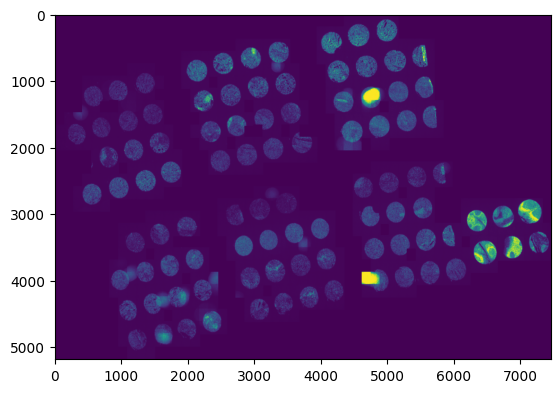

In [6]:
import matplotlib.pyplot as plt
plt.imshow(tma.image)

In [7]:
gds = GridDetectingService()
grid_detecing_parameters = GridDetectingServiceParameters(
    core_diameter=350, 
    column_labels=['12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '-3', '-2', '-1'],
    row_labels=['H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']
)
grid = gds(tma, grid_detecing_parameters)

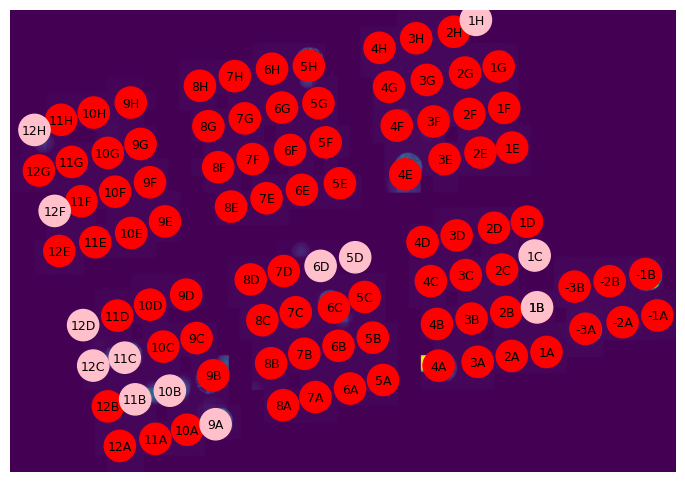

In [19]:
plt.imshow(tma.image)
for gc, dg in grid.detected_cores.items():
    xy=(dg.position.x*max(tma.image.shape),dg.position.y* max(tma.image.shape))
    ax=plt.gca()
    ax.add_patch(plt.Circle(xy,dg.diameter*max(tma.image.shape)/2,color='red'))
    ax.annotate("".join((gc.col_label,gc.row_label)),xy,fontsize=9, ha='center', va='center_baseline')
    
for coords in [("1","B"),("1","C"),("5","D"),("9","A"),("1","H"),("6","D"),("10","B"),("11","B"),("11","C"),("12","C"),("12","D"),("12","F"),("12","H")]:
    ax:plt.Axes = plt.gca()
    dg = grid.get_or_predict(GridCell(*coords))
    xy = (dg.position.x*max(tma.image.shape),dg.position.y* max(tma.image.shape))
    ax.add_patch(plt.Circle(xy,dg.diameter*max(tma.image.shape)/2,color='pink'))
    ax.annotate("".join(coords),xy,fontsize=9, ha='center', va='center_baseline')
plt.axis("off")
plt.gcf().set_size_inches((12,6))